In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# import online data 
from sklearn.datasets import load_digits

digits= load_digits()
obj1=enumerate(digits)
# digits
# type(obj1)
# list(obj1)



In [3]:
# input variables or features 

x=digits.data
digits.data.shape

(1797, 64)

In [4]:
# (1797,64) means 1794 pictures with 64 size (8 by x8)

In [11]:
# output labels (y)
y=digits.target
digits.target.shape

(1797,)

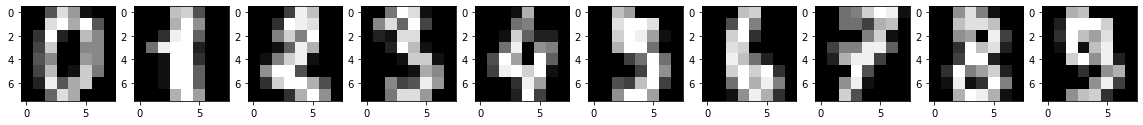

In [6]:
plt.figure(figsize=(20,4))
obj2=zip(digits.data[0:10],digits.data[0:10])
for index, (image,label) in enumerate (obj2,0):
    # zip(digits.data[0:10])
# for index, (image,label) in enumerate(1,10):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    # plt.title(label,fontsize=20)
   

In [7]:
# split the data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:

print ("Train input data:",x_train.shape)
print ("Test input data:",x_test.shape)
print ("Train output data:",y_train.shape)
print ("Test output data:",y_test.shape)

Train input data: (1437, 64)
Test input data: (360, 64)
Train output data: (1437,)
Test output data: (360,)


In [12]:
# Model train
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
model

C:\Users\issa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
log_reg=model.predict(x_test[0:100])
log_reg

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8])

In [19]:
# accuracy test 
score=model.score(x_test,y_test)
print ("The accureacy score is :",score)

The accureacy score is : 0.9666666666666667


In [21]:
# Confusion matrics 
from sklearn.metrics import confusion_matrix
prediction=model.predict(x_test)
cm= confusion_matrix(y_test,prediction)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

# Heat Map 

Text(0.5, 1.0, 'Actual score:0.9666666666666667')

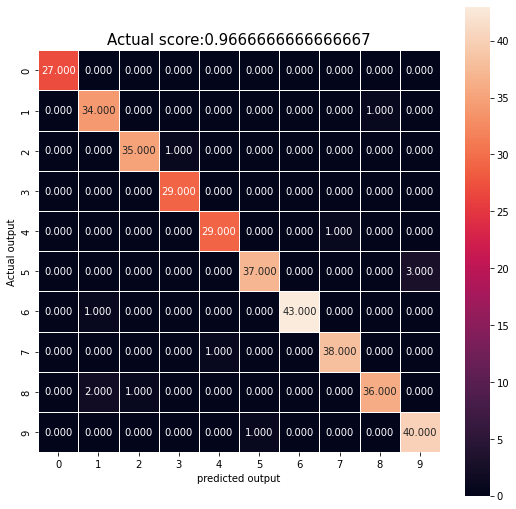

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=1,square=True)
plt.ylabel("Actual output")
plt.xlabel("predicted output")
all_sample_title="Actual score:{0}".format(score)
plt.title(all_sample_title,size=15)

In [ ]:
# Getting miss classified lebels 

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
index=0
misclassifiedIndex=[]
for label,predict in zip(y_test,prediction):
    if label != predict:
        misclassifiedIndex.append(index)
        index+=1
        

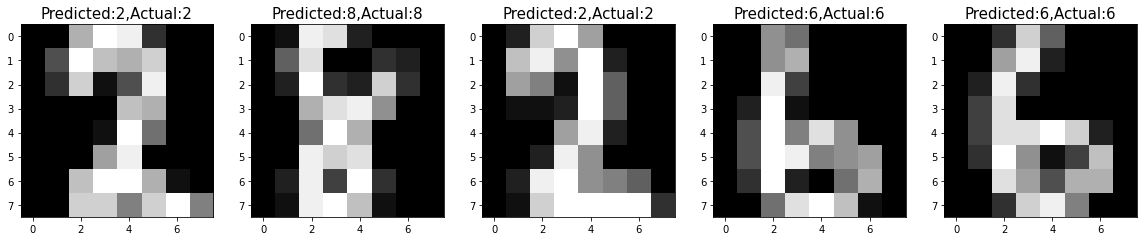

In [31]:
# plotting misclassified labels with known lables ...
plt.figure(figsize=(20,4))
for plotIndex,badIndex in enumerate(misclassifiedIndex[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted:{},Actual:{}".format(prediction[badIndex],y_test[badIndex]),fontsize=15)
